# *Data Analysis of a Youtuber Channel Dataset*

**Loading the data in the df dataframe.**

In [191]:
import pandas as pd
df=pd.read_csv('Global YouTube Statistics.csv',encoding='unicode_escape')

**A look at the rows and columns using the shape function. Here there are 1006 rows and 29 columns.**

In [192]:
df.shape

(1006, 29)

**Changing the formatting of the displayed values to make from a scientific notation to a more readable integer format and using describe() to understand stats about the columns.**

In [193]:
pd.set_option('display.float_format', '{:.0f}'.format)
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,1006,1003,1006,1006,1005,887,971,949,1006,1006,...,1006,666,1001,1001,880,880,880,880,880,880
mean,497,23195015,11124109792,9168,560767,384,742,176097834,37034,592245,...,7110327,349542,2013,16,64,430458623,9,223974719,27,-14
std,289,17830466,14241483441,34028,1368886,1227,1938,415293308,71870,1148967,...,13799208,613155,5,9,26,473553578,5,155038055,21,85
min,1,12300000,0,0,1,1,1,1,0,0,...,0,1,1970,1,8,202506,1,35588,-38,-172
25%,247,14500000,4281427310,194,322,11,26,19740000,2700,43400,...,520750,100000,2009,8,36,83132799,5,55908316,21,-96
50%,498,17700000,7751292168,726,919,50,65,64085000,13250,211700,...,2550000,200000,2013,16,68,328239523,9,270663028,37,-52
75%,749,24750000,13573570517,2606,3645,123,139,169242000,38125,610175,...,7300000,400000,2016,23,88,328239523,15,270663028,37,79
max,995,245000000,228000000000,301308,4057944,7741,7741,6589000000,850900,13600000,...,163400000,8000000,2022,31,113,1397715000,15,842933962,62,138


# Cleaning up data

**A look at the heatmap of missing values across columns giving a visual idea of the cleanup needed.**

<Axes: >

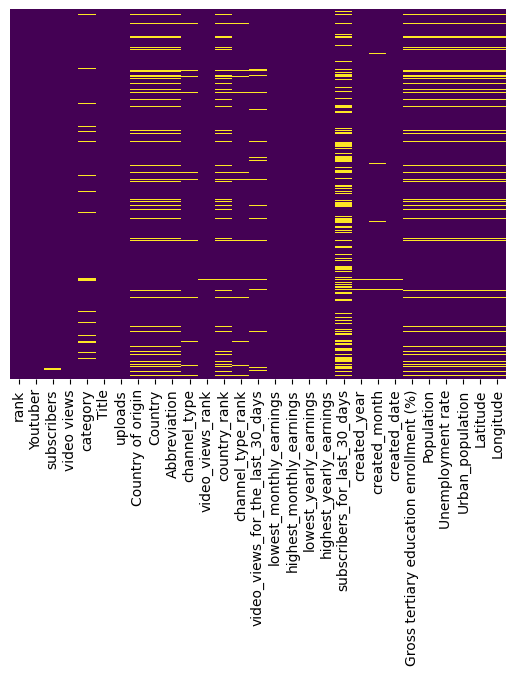

In [194]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**For finding the missing values(np.nan) we use sum() to sum up the boolean return of isna()**

In [195]:
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    55
Title                                        0
uploads                                      0
Country of origin                          125
Country                                    125
Abbreviation                               125
channel_type                                32
video_views_rank                             1
country_rank                               119
channel_type_rank                           35
video_views_for_the_last_30_days            57
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               340
created_year                                 5
created_month

**There is 'Country', 'Country of origin' and 'Abbreviation'. Let's take a closer look.**

In [196]:
df[['Country','Country of origin','Abbreviation']]
#Output shows that all of them essentially are the same columns.

,Country,Country of origin,Abbreviation
0,india,India,IN
1,United States,United States,US
2,United States,United States,US
3,United States,United States,US
4,India,India,IN
...,...,...,...
1001,NaN,NaN,NaN
1002,United Arab Emirates,United Arab Emirates,AE
1003,United States,United States,US
1004,India,India,IN


**Thus we can drop 'Country' and 'Abbreviation' due to difference in casing for same words and use 'Country of origin' for further analysis.**

In [197]:
df.drop(columns=['Country'],inplace=True)
df.drop(columns=['Abbreviation'],inplace=True)

df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,Music,1,...,2000000,2006,Mar,13,28,1366417754,5,471031528,21,79
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,Games,4055159,...,NaN,2006,NaN,5,88,328239523,15,270663028,37,-96
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,Entertainment,48,...,8000000,2012,Feb,20,88,328239523,15,270663028,37,-96
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2,...,1000000,2006,Sep,1,88,328239523,15,270663028,37,-96
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,Entertainment,3,...,1000000,2006,Sep,20,28,1366417754,5,471031528,21,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,779,The Dodo,14200000,9964116817,Pets & Animals,Dorukhan Gï¿½ï¿½ï,8,NaN,NaN,4050736,...,5,2006,Jun,14,NaN,NaN,NaN,NaN,NaN,NaN
1002,787,Supercar Blondie,14100000,5405563355,Autos & Vehicles,Supercar Blondie,855,United Arab Emirates,Autos,1202,...,500000,2007,Sep,12,37,9770529,2,8479744,23,54
1003,871,Just For Laughs Gags,13300000,7406628736,Comedy,Just For Laughs Gags,6916,United States,Comedy,764,...,100000,2007,Jan,14,88,328239523,15,270663028,37,-96
1004,872,Kabita's Kitchen,13300000,2831275503,Howto & Style,Kabita's Kitchen,1489,India,Howto,3123,...,NaN,2014,Oct,7,28,1366417754,5,471031528,21,79


**Let us check for duplicate rows/entries in the dataframe, using the duplicated() function.**

In [198]:
df[df.duplicated()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
995,12,WWE,96000000,77428473662,Sports,WWE,70127,United States,Sports,7,...,600000,2007,May,11,88,328239523,15,270663028,37,-96
996,13,Gaming,93600000,0,NaN,Gaming,0,NaN,Games,4057944,...,NaN,2013,Dec,15,NaN,NaN,NaN,NaN,NaN,NaN
997,39,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,32312431239,Music,LooLoo Kids - Nursery Rhymes and Children's ï¿½,11,NaN,NaN,3800129,...,NaN,2016,Nov,29,NaN,NaN,NaN,NaN,NaN,NaN
998,40,Ed Sheeran,53500000,30367676736,Music,Ed Sheeran,383,United Kingdom,Music,39,...,100000,2006,Aug,8,60,66834405,4,55908316,55,-3
999,41,Infobells - Hindi,53300000,30516172739,Education,Infobells - Hindi,577,India,Education,37,...,1600000,2014,Jun,6,28,1366417754,5,471031528,21,79
1000,620,MY FAMILY,15700000,6153495609,NaN,My Family,150,Singapore,People,731590,...,800,2019,Dec,3,85,5703569,4,5703569,1,104
1001,779,The Dodo,14200000,9964116817,Pets & Animals,Dorukhan Gï¿½ï¿½ï,8,NaN,NaN,4050736,...,5,2006,Jun,14,NaN,NaN,NaN,NaN,NaN,NaN
1002,787,Supercar Blondie,14100000,5405563355,Autos & Vehicles,Supercar Blondie,855,United Arab Emirates,Autos,1202,...,500000,2007,Sep,12,37,9770529,2,8479744,23,54
1003,871,Just For Laughs Gags,13300000,7406628736,Comedy,Just For Laughs Gags,6916,United States,Comedy,764,...,100000,2007,Jan,14,88,328239523,15,270663028,37,-96
1004,872,Kabita's Kitchen,13300000,2831275503,Howto & Style,Kabita's Kitchen,1489,India,Howto,3123,...,NaN,2014,Oct,7,28,1366417754,5,471031528,21,79


**Dropping the duplicate rows.**

In [199]:
df.drop_duplicates(inplace=True)
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,Music,1,...,2000000,2006,Mar,13,28,1366417754,5,471031528,21,79
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,Games,4055159,...,NaN,2006,NaN,5,88,328239523,15,270663028,37,-96
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,Entertainment,48,...,8000000,2012,Feb,20,88,328239523,15,270663028,37,-96
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2,...,1000000,2006,Sep,1,88,328239523,15,270663028,37,-96
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,Entertainment,3,...,1000000,2006,Sep,20,28,1366417754,5,471031528,21,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525,...,700000,2017,Feb,12,51,212559417,12,183241641,-14,-52
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,Games,6141,...,300000,2018,Sep,14,28,1366417754,5,471031528,21,79
992,993,Panda,12300000,2214684303,NaN,HybridPanda,2452,United Kingdom,Games,129005,...,1000,2006,Sep,11,60,66834405,4,55908316,55,-3
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,Games,35112,...,100000,2012,May,9,67,10285453,6,9021165,60,19


**Let us check the created_date field, a field that will be handy in our analysis.**

*Checking out if na values present in created_date and deleting them.*

In [200]:
df[df['created_date'].isna()]
#We notice that the created_year and created_month fields are also missing, thus its best to drop these fields completely.

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
236,237,Chris Brown,25200000,15520569496,Music,ChrisBrown,0,NaN,NaN,3612215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,469,Good Mythical Morning,18300000,8798044678,Entertainment,Goodmythicalmorning,0,NaN,NaN,3612215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,509,The Game Theorists,17600000,3752347262,Gaming,TheGameTheorists,0,Australia,NaN,3612215,...,NaN,NaN,NaN,NaN,113,25766605,5,21844756,-25,134
735,736,LEGENDA FUNK,14500000,2440718089,NaN,LegendaFUNK,0,Brazil,Music,NaN,...,NaN,NaN,NaN,NaN,51,212559417,12,183241641,-14,-52
762,763,Harry Styles,14400000,5689224452,People & Blogs,harrystyles,0,United States,Games,4037956,...,NaN,NaN,NaN,NaN,88,328239523,15,270663028,37,-96


In [201]:
df.dropna(subset='created_date',inplace=True)
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,Music,1,...,2000000,2006,Mar,13,28,1366417754,5,471031528,21,79
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,Games,4055159,...,NaN,2006,NaN,5,88,328239523,15,270663028,37,-96
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,Entertainment,48,...,8000000,2012,Feb,20,88,328239523,15,270663028,37,-96
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2,...,1000000,2006,Sep,1,88,328239523,15,270663028,37,-96
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,Entertainment,3,...,1000000,2006,Sep,20,28,1366417754,5,471031528,21,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525,...,700000,2017,Feb,12,51,212559417,12,183241641,-14,-52
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,Games,6141,...,300000,2018,Sep,14,28,1366417754,5,471031528,21,79
992,993,Panda,12300000,2214684303,NaN,HybridPanda,2452,United Kingdom,Games,129005,...,1000,2006,Sep,11,60,66834405,4,55908316,55,-3
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,Games,35112,...,100000,2012,May,9,67,10285453,6,9021165,60,19


**Checking records having empty created_month**

In [202]:
df['created_month'].isna().sum()

7

**Imputing the records with mode value(month is categorical data).**

In [203]:
created_month_mode=df['created_month'].mode()[0]
df['created_month']=df['created_month'].fillna(value=created_month_mode)
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    52
Title                                        0
uploads                                      0
Country of origin                          120
channel_type                                27
video_views_rank                             0
country_rank                               114
channel_type_rank                           29
video_views_for_the_last_30_days            51
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               332
created_year                                 0
created_month                                0
created_date                                 0
Gross tertiar

**Since all fields related to data(created_date, created_month, created_year) have no missing values, let's combine them into one Channel_Created_Date of datetime datatype.**

_Renaming for convenience_

In [204]:
df.rename(columns={'created_month':'month','created_year':'year','created_date':'day'},inplace=True)
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,subscribers_for_last_30_days,year,month,day,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,Music,1,...,2000000,2006,Mar,13,28,1366417754,5,471031528,21,79
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,Games,4055159,...,NaN,2006,Jan,5,88,328239523,15,270663028,37,-96
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,Entertainment,48,...,8000000,2012,Feb,20,88,328239523,15,270663028,37,-96
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2,...,1000000,2006,Sep,1,88,328239523,15,270663028,37,-96
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,Entertainment,3,...,1000000,2006,Sep,20,28,1366417754,5,471031528,21,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525,...,700000,2017,Feb,12,51,212559417,12,183241641,-14,-52
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,Games,6141,...,300000,2018,Sep,14,28,1366417754,5,471031528,21,79
992,993,Panda,12300000,2214684303,NaN,HybridPanda,2452,United Kingdom,Games,129005,...,1000,2006,Sep,11,60,66834405,4,55908316,55,-3
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,Games,35112,...,100000,2012,May,9,67,10285453,6,9021165,60,19


_Converting the month(3 letter format) to number format_

In [205]:
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,subscribers_for_last_30_days,year,month,day,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,Music,1,...,2000000,2006,3,13,28,1366417754,5,471031528,21,79
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,Games,4055159,...,NaN,2006,1,5,88,328239523,15,270663028,37,-96
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,Entertainment,48,...,8000000,2012,2,20,88,328239523,15,270663028,37,-96
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2,...,1000000,2006,9,1,88,328239523,15,270663028,37,-96
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,Entertainment,3,...,1000000,2006,9,20,28,1366417754,5,471031528,21,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525,...,700000,2017,2,12,51,212559417,12,183241641,-14,-52
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,Games,6141,...,300000,2018,9,14,28,1366417754,5,471031528,21,79
992,993,Panda,12300000,2214684303,NaN,HybridPanda,2452,United Kingdom,Games,129005,...,1000,2006,9,11,60,66834405,4,55908316,55,-3
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,Games,35112,...,100000,2012,5,9,67,10285453,6,9021165,60,19


_Converting all of the year,month,date columns into integers_

In [206]:
df['day'] = df['day'].astype(float).astype(int)
df['month'] = df['month'].astype(float).astype(int)
df['year'] = df['year'].astype(float).astype(int)

_Now converting the month and day values into a 2 digit value_

In [207]:
df['month'] = df['month'].apply(lambda x: f"{x:02d}")
df['day'] = df['day'].apply(lambda x: f"{x:02d}")
df


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,subscribers_for_last_30_days,year,month,day,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,Music,1,...,2000000,2006,03,13,28,1366417754,5,471031528,21,79
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,Games,4055159,...,NaN,2006,01,05,88,328239523,15,270663028,37,-96
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,Entertainment,48,...,8000000,2012,02,20,88,328239523,15,270663028,37,-96
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2,...,1000000,2006,09,01,88,328239523,15,270663028,37,-96
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,Entertainment,3,...,1000000,2006,09,20,28,1366417754,5,471031528,21,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525,...,700000,2017,02,12,51,212559417,12,183241641,-14,-52
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,Games,6141,...,300000,2018,09,14,28,1366417754,5,471031528,21,79
992,993,Panda,12300000,2214684303,NaN,HybridPanda,2452,United Kingdom,Games,129005,...,1000,2006,09,11,60,66834405,4,55908316,55,-3
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,Games,35112,...,100000,2012,05,09,67,10285453,6,9021165,60,19


_Now applying the function to combine all the three columns into one Channel_Created_Date column_

In [208]:
df['Channel_Created_Date'] = pd.to_datetime(df[['year', 'month', 'day']])
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,year,month,day,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Channel_Created_Date
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,Music,1,...,2006,03,13,28,1366417754,5,471031528,21,79,2006-03-13
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,Games,4055159,...,2006,01,05,88,328239523,15,270663028,37,-96,2006-01-05
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,Entertainment,48,...,2012,02,20,88,328239523,15,270663028,37,-96,2012-02-20
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2,...,2006,09,01,88,328239523,15,270663028,37,-96,2006-09-01
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,Entertainment,3,...,2006,09,20,28,1366417754,5,471031528,21,79,2006-09-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525,...,2017,02,12,51,212559417,12,183241641,-14,-52,2017-02-12
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,Games,6141,...,2018,09,14,28,1366417754,5,471031528,21,79,2018-09-14
992,993,Panda,12300000,2214684303,NaN,HybridPanda,2452,United Kingdom,Games,129005,...,2006,09,11,60,66834405,4,55908316,55,-3,2006-09-11
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,Games,35112,...,2012,05,09,67,10285453,6,9021165,60,19,2012-05-09


**Converting the column into a pandas datetime format**

In [209]:
df['Channel_Created_Date'] = pd.to_datetime(df['Channel_Created_Date'])
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,year,month,day,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Channel_Created_Date
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,Music,1,...,2006,03,13,28,1366417754,5,471031528,21,79,2006-03-13
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,Games,4055159,...,2006,01,05,88,328239523,15,270663028,37,-96,2006-01-05
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,Entertainment,48,...,2012,02,20,88,328239523,15,270663028,37,-96,2012-02-20
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2,...,2006,09,01,88,328239523,15,270663028,37,-96,2006-09-01
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,Entertainment,3,...,2006,09,20,28,1366417754,5,471031528,21,79,2006-09-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525,...,2017,02,12,51,212559417,12,183241641,-14,-52,2017-02-12
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,Games,6141,...,2018,09,14,28,1366417754,5,471031528,21,79,2018-09-14
992,993,Panda,12300000,2214684303,NaN,HybridPanda,2452,United Kingdom,Games,129005,...,2006,09,11,60,66834405,4,55908316,55,-3,2006-09-11
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,Games,35112,...,2012,05,09,67,10285453,6,9021165,60,19,2012-05-09


_Dropping the unrequired date, month, year columns_

In [210]:
df.drop(columns=['day','month','year'],inplace=True)
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Channel_Created_Date
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,Music,1,...,6800000,108400000,2000000,28,1366417754,5,471031528,21,79,2006-03-13
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,Games,4055159,...,0,1,NaN,88,328239523,15,270663028,37,-96,2006-01-05
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,Entertainment,48,...,4000000,64700000,8000000,88,328239523,15,270663028,37,-96,2012-02-20
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2,...,5900000,94800000,1000000,88,328239523,15,270663028,37,-96,2006-09-01
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,Entertainment,3,...,5500000,87500000,1000000,28,1366417754,5,471031528,21,79,2006-09-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525,...,1700000,26500000,700000,51,212559417,12,183241641,-14,-52,2017-02-12
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,Games,6141,...,194200,3100000,300000,28,1366417754,5,471031528,21,79,2018-09-14
992,993,Panda,12300000,2214684303,NaN,HybridPanda,2452,United Kingdom,Games,129005,...,201,3200,1000,60,66834405,4,55908316,55,-3,2006-09-11
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,Games,35112,...,11600,185800,100000,67,10285453,6,9021165,60,19,2012-05-09


**Turning our attention to the 'Country of origin' and related columns**

In [211]:
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    52
Title                                        0
uploads                                      0
Country of origin                          120
channel_type                                27
video_views_rank                             0
country_rank                               114
channel_type_rank                           29
video_views_for_the_last_30_days            51
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               332
Gross tertiary education enrollment (%)    121
Population                                 121
Unemployment rate                          121
Urban_populat

_We see that isna values for 'Gross tertiary education enrollment (%)','Population','Unemployment rate','Urban_population','Latitude'&'Longitude' is 121 while 'Country of origin' is 120._

_Assuming that there is one 'Country of Origin' that doesn't have its corresponding parameters known(and the other 120 do), let's find it_

In [212]:
df[df['Latitude'].isna() & ~df['Country of origin'].isna()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Channel_Created_Date
663,664,Musas,15100000,2400037562,Howto & Style,Jordi Sala,159,Andorra,People,3889418,...,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-12


_Dropping the row with 'Country of Origin' as Andorra, we have:_

In [213]:
df.drop(df[df['Country of origin']=='Andorra'].index,inplace=True)
df.isna().sum()#isna values for 'Gross tertiary education enrollment (%)','Population','Unemployment rate','Urban_population','Latitude'&'Longitude' are all 120

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    52
Title                                        0
uploads                                      0
Country of origin                          120
channel_type                                27
video_views_rank                             0
country_rank                               114
channel_type_rank                           29
video_views_for_the_last_30_days            51
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               331
Gross tertiary education enrollment (%)    120
Population                                 120
Unemployment rate                          120
Urban_populat

_Now, here we decide to impute mode values into rows having unknown values of 'Country of origin' and its related fields(Since 120 is quite a large figure out of 990 we will impute the most frequently occurring value rather than drop)_

In [214]:
cols_to_impute=['Country of origin','Population','Urban_population','Unemployment rate','Gross tertiary education enrollment (%)','Latitude','Longitude']

for col in cols_to_impute:
    mode_value = df[col].mode()[0]  # Get the mode of the column
    df[col]=df[col].fillna(mode_value)
    
df.isna().sum()
#FINALLY, all the columns related to Country of origin has been made non-NaN.

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    52
Title                                        0
uploads                                      0
Country of origin                            0
channel_type                                27
video_views_rank                             0
country_rank                               114
channel_type_rank                           29
video_views_for_the_last_30_days            51
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               331
Gross tertiary education enrollment (%)      0
Population                                   0
Unemployment rate                            0
Urban_populat

**Dropping the rows with empty values for subscribers, of which there are only 3, as this is important data.**

In [215]:
df.dropna(subset='subscribers',inplace=True)
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    52
Title                                        0
uploads                                      0
Country of origin                            0
channel_type                                27
video_views_rank                             0
country_rank                               114
channel_type_rank                           29
video_views_for_the_last_30_days            51
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               330
Gross tertiary education enrollment (%)      0
Population                                   0
Unemployment rate                            0
Urban_populat

**Let us have a look at 'category' and 'channel_type' columns**

In [216]:
df['category'].value_counts()

category
Entertainment            236
Music                    200
People & Blogs           130
Gaming                    92
Comedy                    69
Education                 45
Film & Animation          44
Howto & Style             38
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: count, dtype: int64

In [217]:
df['channel_type'].value_counts()

channel_type
Entertainment    302
Music            215
People           100
Games             96
Comedy            51
Education         49
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: count, dtype: int64

*However some rows have neither values...*

In [218]:
df[(df['channel_type'].isna() & df['category'].isna())]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Channel_Created_Date
102,103,News,36300000,0,NaN,News,0,United States,NaN,4057944,...,0,0,NaN,88,328239523,15,270663028,37,-96,2013-09-09
445,446,Busy Fun Ltd,18800000,7762077012,NaN,TG MAYANK YT,2,United States,NaN,4057882,...,0,0,NaN,88,328239523,15,270663028,37,-96,2021-12-21
592,593,Live,16100000,0,NaN,Live,0,United States,NaN,4057944,...,0,0,NaN,88,328239523,15,270663028,37,-96,2015-01-13
904,905,Jomy Production,13000000,5057163256,NaN,SRK Edie soon,8,India,NaN,3686280,...,0,0,NaN,28,1366417754,5,471031528,21,79,2021-03-18


*Getting rid of these 4 rows that have neither the 'category' or 'channel_type' rows*

In [219]:
df.drop(index=df[df['channel_type'].isna() & df['category'].isna()].index, inplace=True)
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    48
Title                                        0
uploads                                      0
Country of origin                            0
channel_type                                23
video_views_rank                             0
country_rank                               111
channel_type_rank                           25
video_views_for_the_last_30_days            48
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               326
Gross tertiary education enrollment (%)      0
Population                                   0
Unemployment rate                            0
Urban_populat

*If we look at the columns side by side...*

In [220]:
df[['channel_type','category']]

,channel_type,category
0,Music,Music
1,Games,Film & Animation
2,Entertainment,Entertainment
3,Education,Education
4,Entertainment,Shows
...,...,...
990,Entertainment,Sports
991,Games,People & Blogs
992,Games,NaN
993,Games,Gaming


*We NOTICE that we can fill in for the category if the data for channel_type is present and vice versa with some changes.*

In [221]:
df['category']=df['category'].fillna(df['channel_type'])
df['channel_type']=df['channel_type'].fillna(df['category'])
df['channel_type'].value_counts()

channel_type
Entertainment           309
Music                   217
People                  100
Games                    96
Comedy                   53
Education                49
Film                     42
Howto                    36
News                     30
Tech                     17
Sports                   13
People & Blogs            4
Howto & Style             3
Autos                     3
Animals                   3
Nonprofit                 2
Gaming                    1
Film & Animation          1
Shows                     1
Pets & Animals            1
Science & Technology      1
Name: count, dtype: int64

*However that results in different(newer) column values as shown above and below.*

In [222]:
df['category'].value_counts()

category
Entertainment            252
Music                    205
People & Blogs           130
Gaming                    92
Comedy                    69
Education                 49
Film & Animation          44
Howto & Style             38
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    12
People                    12
Games                      6
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Film                       2
Howto                      1
Tech                       1
Travel & Events            1
Name: count, dtype: int64

**Filling these new values with the original values in the respective columns**

In [223]:
df['category'] = df['category'].replace('People','People & Blogs')
df['category'] = df['category'].replace('Games','Gaming')
df['category'] = df['category'].replace('Film','Film & Animations')
df['category'] = df['category'].replace('Tech','Science & Technology')
df['category'] = df['category'].replace('Howto','Howto & Style')
df['category'] = df['category'].replace('Film & Animations','Film & Animation')
df['category'].value_counts()

category
Entertainment            252
Music                    205
People & Blogs           142
Gaming                    98
Comedy                    69
Education                 49
Film & Animation          46
Howto & Style             39
News & Politics           26
Science & Technology      18
Shows                     13
Sports                    12
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: count, dtype: int64

In [224]:
df['channel_type'] = df['channel_type'].replace('People & Blogs','People')
df['channel_type'] = df['channel_type'].replace('Gaming','Games')
df['channel_type'] = df['channel_type'].replace('Film & Animation','Film')
df['channel_type'] = df['channel_type'].replace('Shows','Film')
df['channel_type'] = df['channel_type'].replace('Science & Technology','Tech')
df['channel_type'] = df['channel_type'].replace('Howto & Style','Howto')
df['channel_type'] = df['channel_type'].replace('Pets & Animals','Animals')
df['channel_type'].value_counts()

channel_type
Entertainment    309
Music            217
People           104
Games             97
Comedy            53
Education         49
Film              44
Howto             39
News              30
Tech              18
Sports            13
Animals            4
Autos              3
Nonprofit          2
Name: count, dtype: int64

**A look at which columns remain...**

In [225]:
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country of origin                            0
channel_type                                 0
video_views_rank                             0
country_rank                               111
channel_type_rank                           25
video_views_for_the_last_30_days            48
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               326
Gross tertiary education enrollment (%)      0
Population                                   0
Unemployment rate                            0
Urban_populat

**Dropping columns that will not be useful for further analysis(like country_rank,channel_type_rank,video_views_for_the_last_30_days) and those that have too many missing values(subscribers_for_last_30_days)**

In [226]:
df.drop(columns=['country_rank','channel_type_rank','video_views_for_the_last_30_days','subscribers_for_last_30_days'],inplace=True)
df.isna().sum()#FINALLY, the entire dataset is cleaned !

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country of origin                          0
channel_type                               0
video_views_rank                           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
Gross tertiary education enrollment (%)    0
Population                                 0
Unemployment rate                          0
Urban_population                           0
Latitude                                   0
Longitude                                  0
Channel_Created_Date                       0
dtype: int64

**Finishing touches to the clean dataset by resetting index after sorting values by the rank**

In [227]:
#Sort the columns by the rank.
df.sort_values(by='rank',inplace=True)
#Reset index and drop previous index.
df.reset_index(drop=True,inplace=True)
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Channel_Created_Date
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,Music,1,...,9000000,6800000,108400000,28,1366417754,5,471031528,21,79,2006-03-13
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,Games,4055159,...,0,0,1,88,328239523,15,270663028,37,-96,2006-01-05
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,Entertainment,48,...,5400000,4000000,64700000,88,328239523,15,270663028,37,-96,2012-02-20
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2,...,7900000,5900000,94800000,88,328239523,15,270663028,37,-96,2006-09-01
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,Entertainment,3,...,7300000,5500000,87500000,28,1366417754,5,471031528,21,79,2006-09-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,991,Natan por Aï¿,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525,...,2200000,1700000,26500000,51,212559417,12,183241641,-14,-52,2017-02-12
978,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,Games,6141,...,258900,194200,3100000,28,1366417754,5,471031528,21,79,2018-09-14
979,993,Panda,12300000,2214684303,Gaming,HybridPanda,2452,United Kingdom,Games,129005,...,268,201,3200,60,66834405,4,55908316,55,-3,2006-09-11
980,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,Games,35112,...,15500,11600,185800,67,10285453,6,9021165,60,19,2012-05-09


# Questions and Analysis

**1.	What are the top 10 YouTube channels based on the number of subscribers?**

In [228]:
max_subs_df=df.sort_values(by=['subscribers'],ascending=False).head(10)
max_subs_df[['Youtuber','subscribers']]

,Youtuber,subscribers
0,T-Series,245000000
1,YouTube Movies,170000000
2,MrBeast,166000000
3,Cocomelon - Nursery Rhymes,162000000
4,SET India,159000000
5,Music,119000000
6,ýýý Kids Diana Show,112000000
7,PewDiePie,111000000
8,Like Nastya,106000000
9,Vlad and Niki,98900000


*For further analysis you can have a look at max_subs_df.*

**2.	Which category has the highest average number of subscribers?**

In [229]:
category_wise_avg_subs=df.groupby(['category'])['subscribers'].mean()
category_wise_avg_subs.sort_values(ascending=False)

category
Shows                   41615385
Trailers                39000000
Nonprofits & Activism   27750000
Film & Animation        26995652
Music                   26732195
Sports                  26191667
Education               25991837
Movies                  25650000
Entertainment           21739286
Gaming                  21585714
News & Politics         20630769
People & Blogs          20211268
Comedy                  20123188
Howto & Style           19620513
Science & Technology    18388889
Pets & Animals          18100000
Autos & Vehicles        17850000
Travel & Events         12500000
Name: subscribers, dtype: float64

*The 'Shows' category leads followed by 'Trailers'. 'Travel & Events' have the least average subscribers*

**3.	How many videos, on average, are uploaded by YouTube channels in each category?**

In [230]:
category_wise_avg_vids=df.groupby(['category'])['uploads'].mean()
category_wise_avg_vids.sort_values(ascending=False)

category
News & Politics         112484
Nonprofits & Activism   102912
Shows                    27444
Sports                   13342
Entertainment            11411
People & Blogs            8712
Trailers                  6839
Pets & Animals            4452
Gaming                    4075
Movies                    3553
Education                 2897
Film & Animation          2796
Music                     2310
Science & Technology      2025
Autos & Vehicles          1898
Howto & Style             1705
Comedy                    1120
Travel & Events            766
Name: uploads, dtype: float64

*The 'News & Politics' category on an average has higher number of uploads. 'Travel and Events' is again lowest.*

**4.	What are the top 5 countries with the highest number of YouTube channels?**

In [231]:
ytchannel_wise_highest_countries=df.groupby(['Country of origin'])['Country of origin'].size()
ytchannel_wise_highest_countries.sort_values(ascending=False).head()

Country of origin
United States     429
India             166
Brazil             61
United Kingdom     43
Mexico             33
Name: Country of origin, dtype: int64

*US leads the pack by far, followed by India in three-figure number of of Youtube Channels. Brazil, UK and Mexico follow*

**5.	What is the distribution of channel types across different categories?**

In [232]:
df.groupby(['category', 'channel_type']).size()#.reset_index(name='count')

category          channel_type 
Autos & Vehicles  Autos             1
                  Entertainment     1
Comedy            Comedy           40
                  Entertainment    20
                  Film              1
                                   ..
Sports            Entertainment     1
                  Sports           11
Trailers          Entertainment     1
                  Music             1
Travel & Events   Entertainment     1
Length: 79, dtype: int64

*We can either display it as a series or reset_index to get it as a dataframe.*

**6.	Is there a correlation between the number of subscribers and total video views for YouTube channels?**

_Correlation: If positive, they are directly correlated, if negative, then inversely. A higher value(Max value of the magnitude is 1) suggests strongness. 0 suggests no correlation whatsoever._

In [233]:
df['subscribers'].corr(df['video views'])

0.7516582558417109

*Here we can claim that number of subscribers and total video views are positively, strongly correlated.*

**7.	How do the monthly earnings vary throughout different categories?**

In [234]:
category_wise_monthly_earnings=df.groupby(['category'])[['lowest_monthly_earnings','highest_monthly_earnings']].mean()
category_wise_monthly_earnings.rename(columns={'lowest_monthly_earnings':'lowest_ME(Mean)','highest_monthly_earnings':'highest_ME(Mean)'},inplace=True)
category_wise_monthly_earnings[['lowest_ME(Median)','highest_ME(Median)']]=df.groupby(['category'])[['lowest_monthly_earnings','highest_monthly_earnings']].median()
category_wise_monthly_earnings

,lowest_ME(Mean),highest_ME(Mean),lowest_ME(Median),highest_ME(Median)
category,,,,
Autos & Vehicles,68300,1086350,68300,1086350
Comedy,41868,668312,8300,132100
Education,43006,689063,20900,334800
Entertainment,38873,620881,11850,189750
Film & Animation,45472,727700,13100,209850
Gaming,20064,322057,9800,156550
Howto & Style,12292,196358,5800,93100
Movies,28400,454700,28400,454700
Music,34938,557874,22200,354600


_While we get a  fair idea of the statistics around Monthly Earnings across categories, to conclude Autos & Vehicles is head and shoulders above the rest would not be wise as we can see that there is only one data observation(the mean and median values for lowest_ME and highest_ME are the same)._

**8.	What is the overall trend in subscribers gained in the last 30 days across all channels?**

*Since we had seen that the 'subscribers_for_last_30_days' column had 326 missing values from a total of 982 entries, so we had taken the decision to drop the column.*

**9.	Are there any outliers in terms of yearly earnings from YouTube channels?**

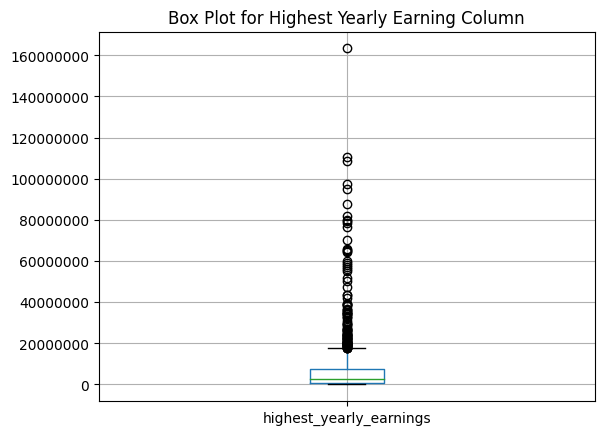

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

df.boxplot(column='highest_yearly_earnings')
plt.title('Box Plot for Highest Yearly Earning Column')
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y') #Formal the values on Y axis by normal notation
plt.show()

*This is a large dataset. Box lies between 35925(25%) to 461525(75%) while the median(50%) is at  162500.(As seen in .describe() below) There are lots of outliers after the Q3+1.5(IQR) that is th upper whisker. It is a similar case for Highest Yearly Earning Column.*

In [236]:
df['lowest_yearly_earnings'].describe()

count        982
mean      447540
std       865599
min            0
25%        35925
50%       162500
75%       461525
max     10200000
Name: lowest_yearly_earnings, dtype: float64

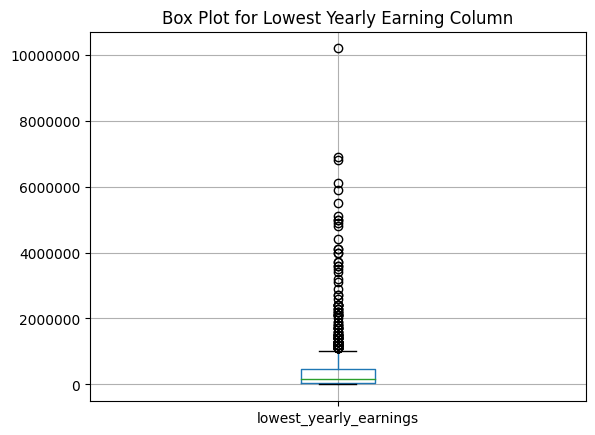

In [237]:
df.boxplot(column='lowest_yearly_earnings')
plt.title('Box Plot for Lowest Yearly Earning Column')
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y') #Formal the values on Y axis by normal notation
plt.show()

**10.	What is the distribution of channel creation dates? Is there any trend over time?**

*First we group the channels monthwise by the Channel_Created_Date.This gives us a series of months and the number of YT Channels created in that month.*

*We reset_index in order to convert that series into a dataframe to use it to plot*

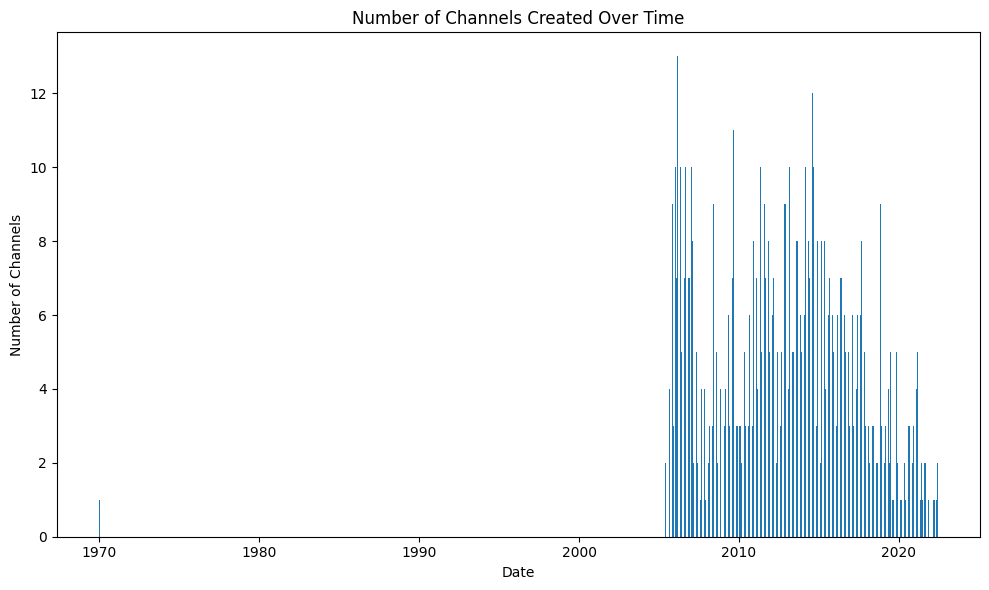

In [238]:
channel_counts = df.groupby(df['Channel_Created_Date'].dt.to_period('M')).size()
# Reset index for plotting
channel_counts = channel_counts.reset_index(name='Count')
channel_counts['Channel_Created_Date'] = channel_counts['Channel_Created_Date'].dt.to_timestamp()
# Plot
plt.figure(figsize=(10, 6))
plt.bar(channel_counts['Channel_Created_Date'], channel_counts['Count'], width=20, align='center')
plt.title('Number of Channels Created Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Channels')
plt.xticks()
plt.tight_layout()
plt.show()

*That spooky spike at 1-1-1970 is this data here, the YouTube official channel which, although was created in 2005, but has a legacy glitch(Unix Epoch Glitch).*

In [239]:
df[df['Channel_Created_Date']==df['Channel_Created_Date'].min()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,...,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Channel_Created_Date
101,102,YouTube,36300000,3010784935,News & Politics,YouTube,744,United States,Entertainment,2860,...,84400,63300,1000000,88,328239523,15,270663028,37,-96,1970-01-01


*2005-06,2011-12, 2014-15 are the three periods in its history where we could say the channel creation spiked. Post COVID(2020) the levels have just not been the same.*

**11.	Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?**

In [240]:
ytchannel_wise_country=df.groupby(['Country of origin'])['Youtuber'].count().reset_index()
ytchannel_wise_country.rename(columns={'Youtuber':'Count of Channels'},inplace=True)
gtee_per_country = df[['Country of origin', 'Gross tertiary education enrollment (%)']].drop_duplicates()
analysis_df = pd.merge(ytchannel_wise_country, gtee_per_country, on='Country of origin')
analysis_df.head()

,Country of origin,Count of Channels,Gross tertiary education enrollment (%)
0,Afghanistan,1,10
1,Argentina,13,90
2,Australia,8,113
3,Bangladesh,1,21
4,Barbados,1,65


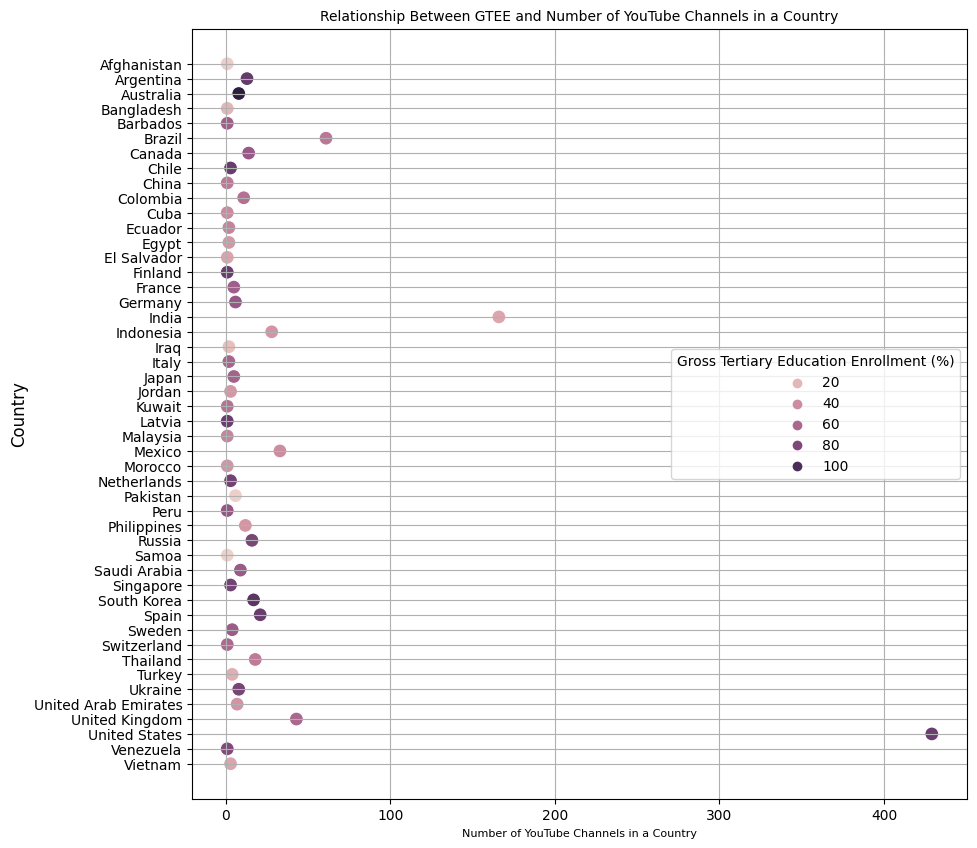

In [241]:
# Scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=analysis_df, y='Country of origin', x='Count of Channels', hue='Gross tertiary education enrollment (%)', s=100)

# Add titles and labels
plt.title('Relationship Between GTEE and Number of YouTube Channels in a Country', fontsize=10)
plt.ylabel('Country', fontsize=12)
plt.xlabel('Number of YouTube Channels in a Country', fontsize=8)
plt.legend(title='Gross Tertiary Education Enrollment (%)',loc='center right')
plt.grid(True)
plt.show()

_When we take US and India out of the way, we see a tiny pattern: The darker dots denoting a higher Gross Tertiary Education Enrollment edge the lighter ones in having more YouTube channels in a country, so we could say that on a lower level higher GTEE may mean a higher number of channels in the country._

**12.	How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?**

In [242]:
Unemployment_per_country = df[['Country of origin', 'Unemployment rate']].drop_duplicates()
unemp_analysis_df = pd.merge(ytchannel_wise_country, Unemployment_per_country, on='Country of origin')
unemp_analysis_df.head()

,Country of origin,Count of Channels,Unemployment rate
0,Afghanistan,1,11
1,Argentina,13,10
2,Australia,8,5
3,Bangladesh,1,4
4,Barbados,1,10


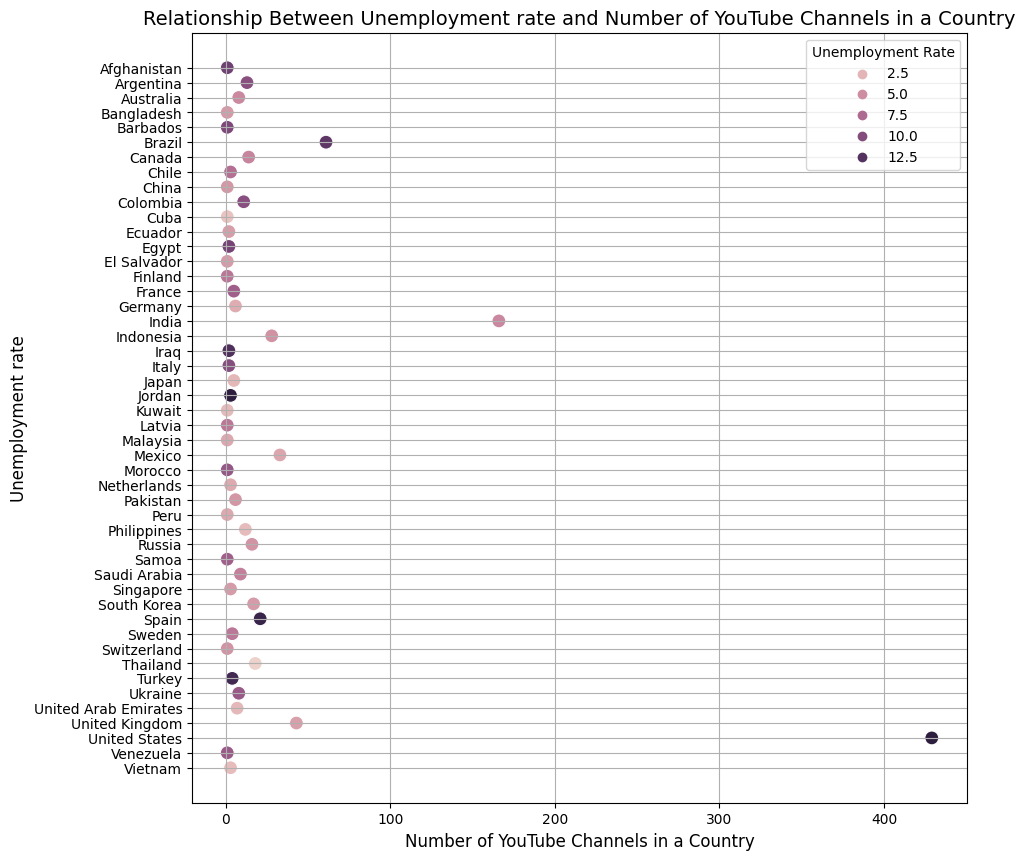

In [243]:
# Scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=unemp_analysis_df, y='Country of origin', x='Count of Channels', hue='Unemployment rate', s=100)
# Add titles and labels
plt.title('Relationship Between Unemployment rate and Number of YouTube Channels in a Country', fontsize=14)
plt.ylabel('Unemployment rate', fontsize=12)
plt.xlabel('Number of YouTube Channels in a Country', fontsize=12)
plt.legend(title='Unemployment Rate')
plt.grid(True)
plt.show()

**13.	What is the average urban population percentage in countries with YouTube channels?**

In [244]:
(df['Urban_population']/df['Population']).mean()*100

71.9712976773248

**14.	Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?**

In [245]:
lat_long_relation=df.groupby(['Country of origin','Latitude', 'Longitude']).size().reset_index(name='Channel Count')
lat_long_relation.head()

,Country of origin,Latitude,Longitude,Channel Count
0,Afghanistan,34,68,1
1,Argentina,-38,-64,13
2,Australia,-25,134,8
3,Bangladesh,24,90,1
4,Barbados,13,-60,1


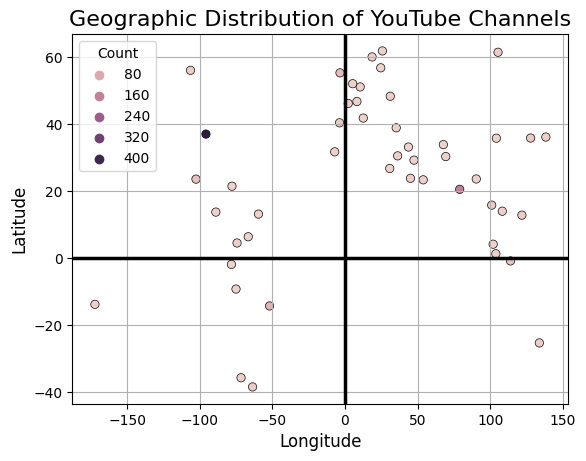

In [246]:
sns.scatterplot(x=lat_long_relation['Longitude'], y=lat_long_relation['Latitude'], hue=lat_long_relation['Channel Count'], color='blue', edgecolor='black')

# Add titles and labels
plt.title('Geographic Distribution of YouTube Channels', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Count')
plt.grid(True)

# Add horizontal and vertical bold lines at 0,0
plt.axhline(y=0, color='black', linewidth=2.5, linestyle='-', label='Equator')
plt.axvline(x=0, color='black', linewidth=2.5, linestyle='-', label='Prime Meridian')

plt.show()

*Clearly, the northern hemisphere of Earth dominates the YouTube Channel scene, with maximum coming from the East(one of which is India), followed by South Western Countries like Brazil and finally Australia in the South East.*

**15.	What is the correlation between the number of subscribers and the population of a country?**

In [247]:
df['subscribers'].corr(df['Population'])

0.07808291700539251

*Statistically, we don't have a clear correlation between the 'number of subscribers' and 'Population' as the correlation value lies shy of 0.08, which is more closer to showing that they are not correlated(Although this defeats the logical explanation)*

**16.	How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?**

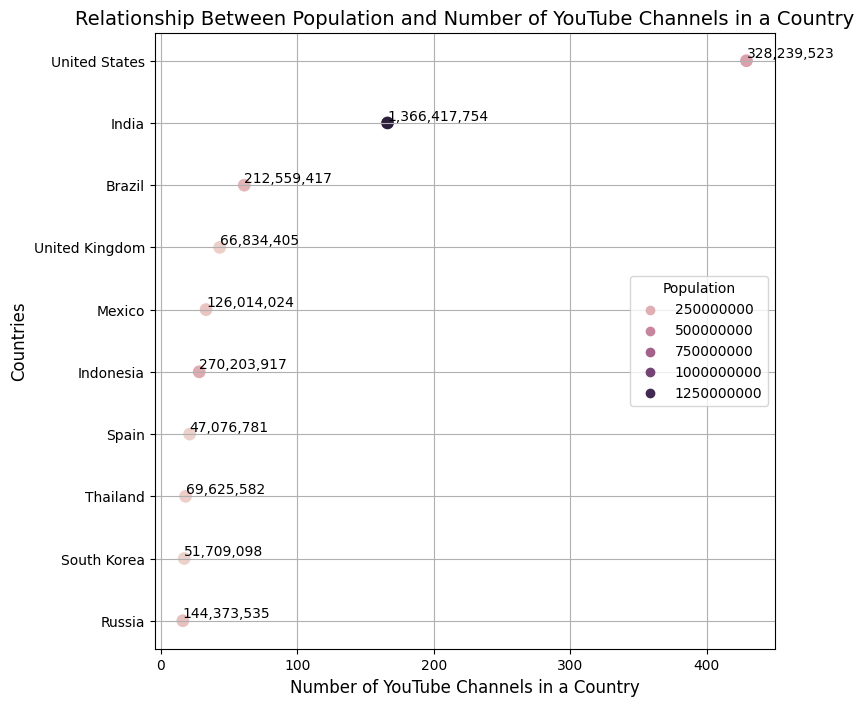

In [248]:
population_per_country = df[['Country of origin', 'Population']].drop_duplicates()
population_analysis_df = pd.merge(ytchannel_wise_country, population_per_country, on='Country of origin')
top10_highest_YT_channels_countries_population=population_analysis_df.sort_values(by='Count of Channels',ascending=False).head(10)
top10_highest_YT_channels_countries_population['Population']=top10_highest_YT_channels_countries_population['Population'].astype('int')#To get int vals instead of float

# Scatter plot
plt.figure(figsize=(8,8))
sns.scatterplot(data=top10_highest_YT_channels_countries_population, y='Country of origin', x='Count of Channels', hue='Population', s=100)

# Annotate population values on each dot
for index, row in top10_highest_YT_channels_countries_population.iterrows():
    plt.text(
        row['Count of Channels'],  # X-coordinate
        row['Country of origin'],  # Y-coordinate
        f"{row['Population']:,}",  # Text (formatted with commas)
        fontsize=10, color='black', ha='left', va='bottom'
    )

# Add titles and labels
plt.title('Relationship Between Population and Number of YouTube Channels in a Country', fontsize=14)
plt.ylabel('Countries', fontsize=12)
plt.xlabel('Number of YouTube Channels in a Country', fontsize=12)
plt.legend(title='Population',loc='center right')
plt.grid(True)
plt.show()

In [249]:
population_per_country.sort_values(by='Population', ascending=False).reset_index(drop=True)

,Country of origin,Population
0,China,1397715000
1,India,1366417754
2,United States,328239523
3,Indonesia,270203917
4,Pakistan,216565318
5,Brazil,212559417
6,Bangladesh,167310838
7,Russia,144373535
8,Japan,126226568
9,Mexico,126014024


*We can clearly see that in a list of top-10 countries with most YouTube channels, India, United States, Indonesia, Brazil are in the top-6 for Population in the world, thus hinting at a relation between the population of the country v/s number of channels.*

In [250]:
population_analysis_df['Count of Channels'].corr(population_analysis_df['Population'])

0.3449750667903265

*Here's a look at the correlation as well, which gives a value of 0.345- a very slight positive correlation*

**17.	Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?**

*Since we had seen that the 'subscribers_for_last_30_days' column had 326 missing values from a total of 982 entries, so we had taken the decision to drop the column.*

**18.	How does the distribution of video views for the last 30 days vary across different channel types?**

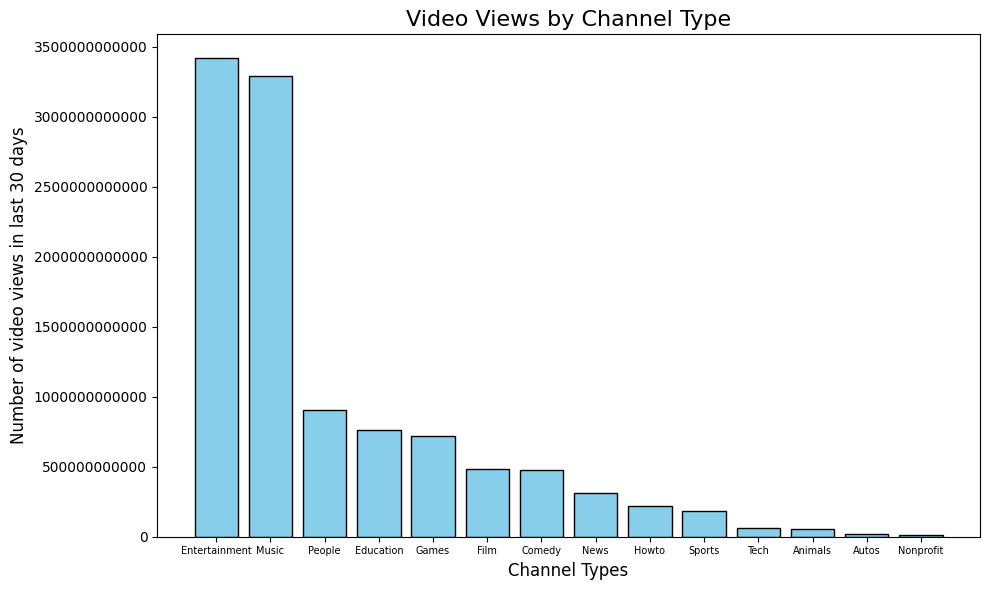

In [251]:
ytchannel_type_wise_video_views=df.groupby(['channel_type'])['video views'].sum().reset_index()
ytchannel_type_wise_video_views.sort_values(by='video views',ascending=False,inplace=True)
ytchannel_type_wise_video_views
# Plot
plt.figure(figsize=(10, 6))
plt.bar(ytchannel_type_wise_video_views['channel_type'], ytchannel_type_wise_video_views['video views'], color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Video Views by Channel Type', fontsize=16)
plt.xlabel('Channel Types', fontsize=12)
plt.ylabel('Number of video views in last 30 days', fontsize=12)

#Getting the values on Y axis in standard notation instead of Scientific notation
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y') 

plt.xticks(fontsize=7)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**19.	Are there any seasonal trends in the number of videos uploaded by YouTube channels?**

_In order to understand seasonal trends in number of videos uploaded by YouTube channels we would need data regarding the uploading date of videos etc. which we don't have._

**20.	What is the average number of subscribers gained per month since the creation of YouTube channels till now?**

In [252]:
import datetime
current_date = pd.Timestamp.today().date()
df['Months_Since_Creation']= ((current_date.year - df['Channel_Created_Date'].dt.year) * 12 + (current_date.month - df['Channel_Created_Date'].dt.month))
(df['subscribers']/df['Months_Since_Creation']).mean()

183635.94591242148

# Completion of Analysis.